In [16]:
from numpy import *
from sympy import *
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as pyplot
import sympy,numpy
from sympy.abc import *

init_printing(use_latex=True,use_unicode=True)

def ode_ics(exp,f,sym,ics):
    f = dsolve(exp,f).rhs
    constants = solve([i(f,sym,order).subs(sym,x)-y for (i,order,x,y) in ics])
    f = f.subs(constants)
    return f

def do_nothing(exp,sym):
    return exp

xs, vs, ms, ks =symbols('x v m k')
u,v,w = symbols('u v w', cls=Function)

DOF = input('No. of degrees of freedom: ')

x0=Matrix([1,2,3])
x0
v0=Matrix([-1,3,4])
v0

k1=25.9
k2=111.88
k3=174.82

m1=0.05823
m2=0.04658
m3=0.03484

m=sympy.diag(m1,m2,m3)

k=sympy.Matrix([[k1+k2,-k2,0],[-k2,k2+k3,-k3],[0,-k3,k3]])

d=m.inv()*k

temp=d.eigenvects()
temp=[(sympy.sqrt(re(i[0])), i[2][0]) for i in temp]
temp.sort(key=lambda tup: tup[0])

phi=Matrix([[re(j) for j in i[1]] for i in temp]).transpose()

MD=phi.transpose()*m*phi

KD=phi.transpose()*k*phi

x02=phi.inv()*x0

v02=phi.inv()*v0

e1=sympy.Eq(MD[0,0]*diff(u(t),t,2) + KD[0,0]*u(t),0)
su = ode_ics(e1,u(t),t,[(diff,0,0,x02[0,0]),(diff,1,0,v02[0,0])])

e2=sympy.Eq(MD[1,1]*diff(v(t),t,2) + KD[1,1]*v(t),0)
sv = ode_ics(e2,v(t),t,[(diff,0,0,x02[1,0]),(diff,1,0,v02[1,0])])

e3=sympy.Eq(MD[2,2]*diff(w(t),t,2) + KD[2,2]*w(t),0)
sw = ode_ics(e3,w(t),t,[(diff,0,0,x02[2,0]),(diff,1,0,v02[2,0])])

dis=phi*Matrix([[su],[sv],[sw]])

No. of degrees of freedom: 13


In [2]:
Eq(MatrixSymbol('M',m.rows,m.cols),m)

    ⎡0.05823     0        0   ⎤
    ⎢                         ⎥
M = ⎢   0     0.04658     0   ⎥
    ⎢                         ⎥
    ⎣   0        0     0.03484⎦

In [3]:
Eq(MatrixSymbol('K',k.rows,k.cols),k)

    ⎡137.78   -111.88     0   ⎤
    ⎢                         ⎥
K = ⎢-111.88   286.7   -174.82⎥
    ⎢                         ⎥
    ⎣   0     -174.82  174.82 ⎦

In [4]:
Eq(MatrixSymbol('D',d.rows,d.cols),d)

    ⎡2366.13429503692   -1921.3463850249           0        ⎤
    ⎢                                                       ⎥
D = ⎢-2401.88922284242  6155.00214684414   -3753.11292400172⎥
    ⎢                                                       ⎥
    ⎣        0          -5017.79563719862  5017.79563719862 ⎦

In [5]:
Eq(MatrixSymbol('Phi',phi.rows,phi.cols),phi)

    ⎡0.845153846527721  -1.06324942340928  0.25494889030009 ⎤
    ⎢                                                       ⎥
Φ = ⎢0.966198590257339  0.388530514785625  -1.05291234285978⎥
    ⎢                                                       ⎥
    ⎣       1.0                1.0                1.0       ⎦

In [6]:
Eq(MatrixSymbol('M_D',MD.rows,MD.cols),MD)

      ⎡  0.119917096927699    -2.08166817117217e-17  -4.16333634234434e-17⎤
      ⎢                                                                   ⎥
M_D = ⎢-3.46944695195361e-17    0.107700505017052    -3.46944695195361e-17⎥
      ⎢                                                                   ⎥
      ⎣-4.16333634234434e-17  -3.46944695195361e-17   0.0902646127153682  ⎦

In [7]:
Eq(MatrixSymbol('K_D',KD.rows,KD.cols),KD)

      ⎡  20.3389668893086    -5.15143483426073e-14  -1.06581410364015e-14⎤
      ⎢                                                                  ⎥
K_D = ⎢-5.6843418860808e-14    330.449803673752     -2.98427949019242e-13⎥
      ⎢                                                                  ⎥
      ⎣         0            -2.8421709430404e-13     929.824314392495   ⎦

In [8]:
Eq(MatrixSymbol('x02',x02.rows,x02.cols),x02)

      ⎡2.03260732119492 ⎤
      ⎢                 ⎥
x₀₂ = ⎢0.731681702140857⎥
      ⎢                 ⎥
      ⎣0.235710976664219⎦

In [9]:
Eq(MatrixSymbol('v02',v02.rows,v02.cols),v02)

      ⎡ 1.87765788438831 ⎤
      ⎢                  ⎥
v₀₂ = ⎢ 2.37293472320119 ⎥
      ⎢                  ⎥
      ⎣-0.250592607589496⎦

In [10]:
Eq(symbols('su'),nfloat(su,n=6))

In [11]:
Eq(symbols('sv'),nfloat(sv,n=6))

In [12]:
Eq(symbols('sw'),nfloat(sw,n=6))

In [13]:
Eq(MatrixSymbol('X',dis.rows,dis.cols),nfloat(dis,n=6))

    ⎡0.121851⋅sin(13.0234⋅t) - 0.0455488⋅sin(55.3916⋅t) - 0.000629477⋅sin(101.
    ⎢                                                                         
X = ⎢ 0.139303⋅sin(13.0234⋅t) + 0.0166444⋅sin(55.3916⋅t) + 0.00259967⋅sin(101.
    ⎢                                                                         
    ⎣0.144176⋅sin(13.0234⋅t) + 0.0428393⋅sin(55.3916⋅t) - 0.00246903⋅sin(101.4

494⋅t) + 1.71787⋅cos(13.0234⋅t) - 0.77796⋅cos(55.3916⋅t) + 0.0600943⋅cos(101.4
                                                                              
494⋅t) + 1.9639⋅cos(13.0234⋅t) + 0.284281⋅cos(55.3916⋅t) - 0.248183⋅cos(101.49
                                                                              
94⋅t) + 2.03261⋅cos(13.0234⋅t) + 0.731682⋅cos(55.3916⋅t) + 0.235711⋅cos(101.49

94⋅t)⎤
     ⎥
4⋅t) ⎥
     ⎥
4⋅t) ⎦

In [14]:
%matplotlib notebook

<IPython.core.display.Javascript object>


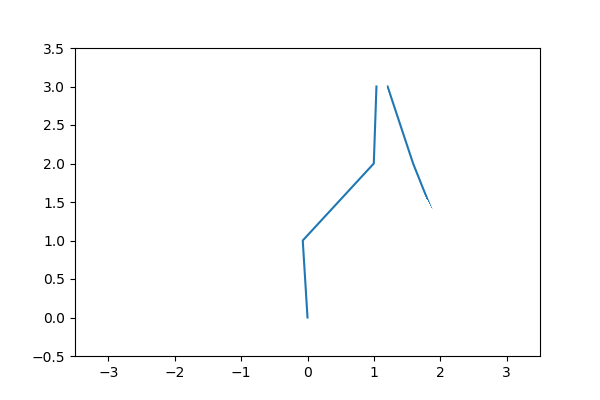

In [15]:
def expr1(i): 
    return dis[2,0].subs(t,i)

def expr2(i): 
    return dis[1,0].subs(t,i)

def expr3(i): 
    return dis[0,0].subs(t,i)

h = [3,2,1,0]

fig = pyplot.figure(figsize=(6, 4))
ax = pyplot.axes(xlim=(-3.5, 3.5), ylim=(-0.5, 3.5))
pts, = ax.plot([], [])

# pyplot.figure(figsize=(9,6))
def init():
    pts.set_data([expr1(0),expr2(0),expr3(0),0], h)
    return pts,
# pyplot.axis([-5, 5, -0.5, 3.5])

def animate(i):
    i /= 1600
    pts.set_data([expr1(i),expr2(i),expr3(i),0],h)
    return pts,
    
anim = FuncAnimation(fig, animate, init_func=init, frames=1000000000, interval=10, blit=True)

pyplot.show()